 # SPORT INJURY ANALYSIS

In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

**Data Understanding and Exploration:**

In [458]:
desu = pd.read_csv('final2.csv')

In [460]:
desu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   athlete_id     543 non-null    int64 
 1   date           543 non-null    object
 2   postion        543 non-null    object
 3   value          543 non-null    int64 
 4   game_workload  543 non-null    int64 
 5   injury         543 non-null    object
dtypes: int64(3), object(3)
memory usage: 25.6+ KB


In [462]:
desu.head()


,athlete_id,date,postion,value,game_workload,injury
0,1,5/1/2016,midfilder,36,178,No
1,1,5/2/2016,midfilder,36,234,yes
2,1,5/3/2016,midfilder,56,678,No
3,1,5/4/2016,midfilder,24,543,No
4,1,5/5/2016,midfilder,35,402,yes


In [464]:
print(f"Dataset shape: {desu.shape}")

Dataset shape: (543, 6)


**Check for missing values**

In [467]:
# Check for missing values
print(desu.isnull().sum())

athlete_id       0
date             0
postion          0
value            0
game_workload    0
injury           0
dtype: int64


In [469]:
#to uderstand the destribution of numerical features
desu.describe()

,athlete_id,value,game_workload
count,543.000000,543.000000,543.000000
mean,15.644567,39.338858,351.029466
std,8.775217,10.186784,105.176004
min,1.000000,7.000000,34.000000
25%,7.000000,33.000000,293.000000
50%,16.000000,39.000000,365.000000
75%,23.000000,46.000000,411.500000
max,31.000000,77.000000,678.000000


In [471]:
desu = desu.rename(columns={'athlete_id':'footballer_id'}) 

In [473]:
desu.sort_values("postion", ascending = False,inplace= True)

In [475]:
desu

,footballer_id,date,postion,value,game_workload,injury
0,1,5/1/2016,midfilder,36,178,No
196,11,11/13/2016,midfilder,38,356,Yes
202,11,11/19/2016,midfilder,69,349,No
201,11,11/18/2016,midfilder,25,349,No
200,11,11/17/2016,midfilder,39,356,No
...,...,...,...,...,...,...
318,19,3/15/2017,attacker,30,235,No
317,19,3/14/2017,attacker,35,235,No
316,19,3/13/2017,attacker,61,235,No
315,19,3/12/2017,attacker,31,235,No


In [477]:
"""Maximum workload taken by a player ina game"""
desu["game_workload"].max()

678

In [479]:
"""player with maximum worload in a game"""
desu.loc[desu['game_workload'].idxmax()]

footballer_id            1
date              5/3/2016
postion          midfilder
value                   56
game_workload          678
injury                  No
Name: 2, dtype: object

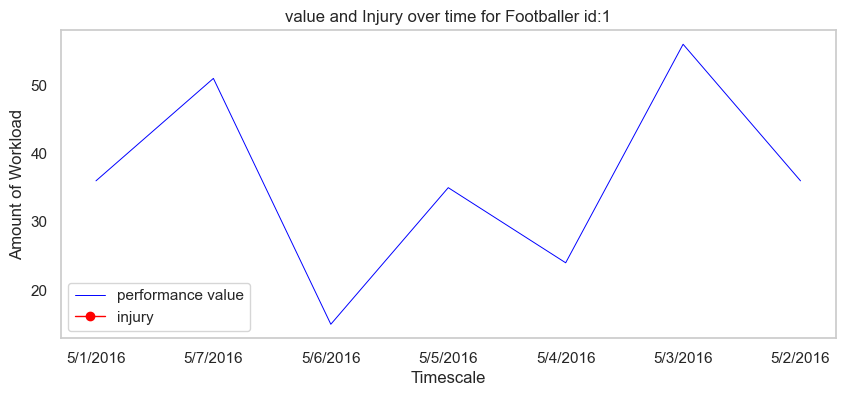

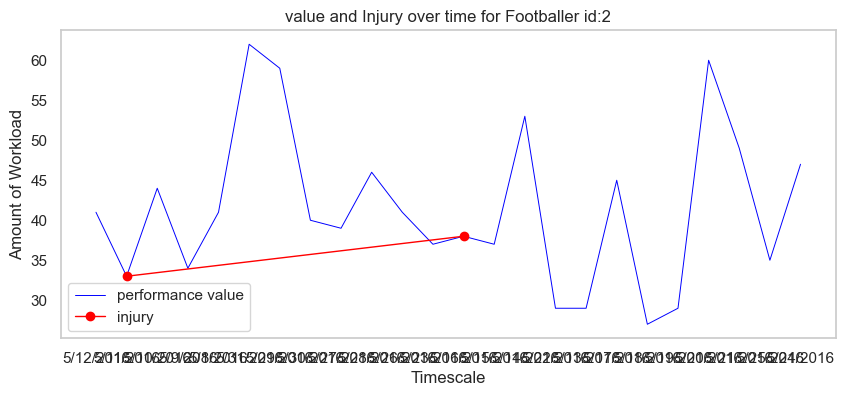

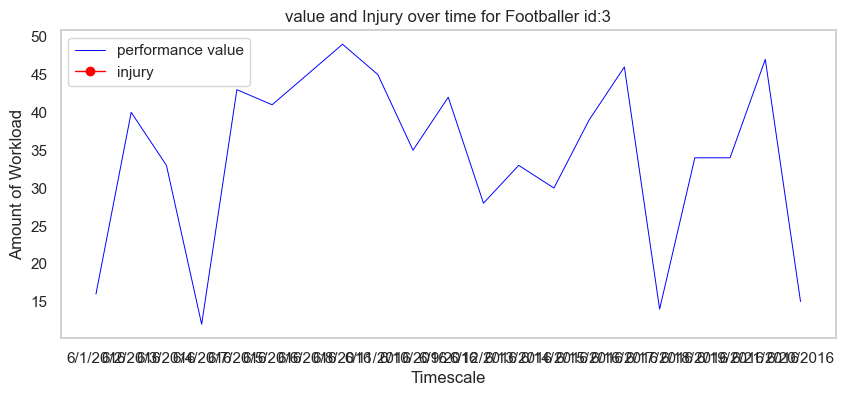

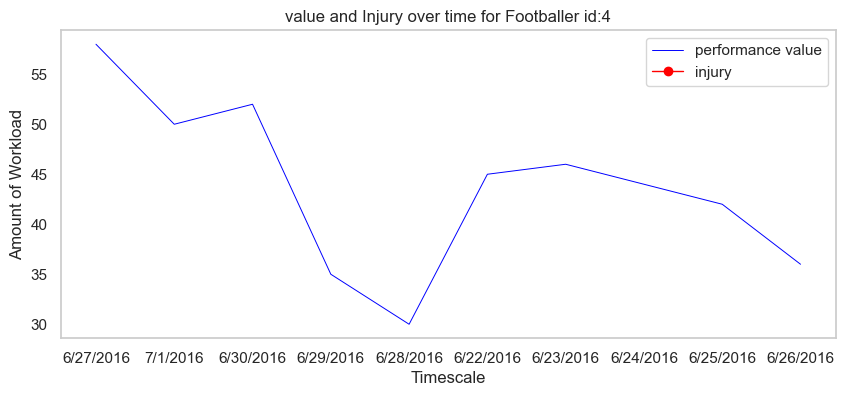

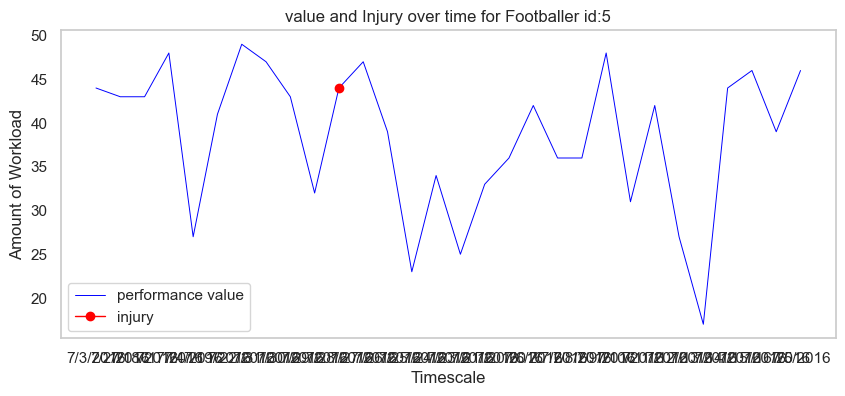

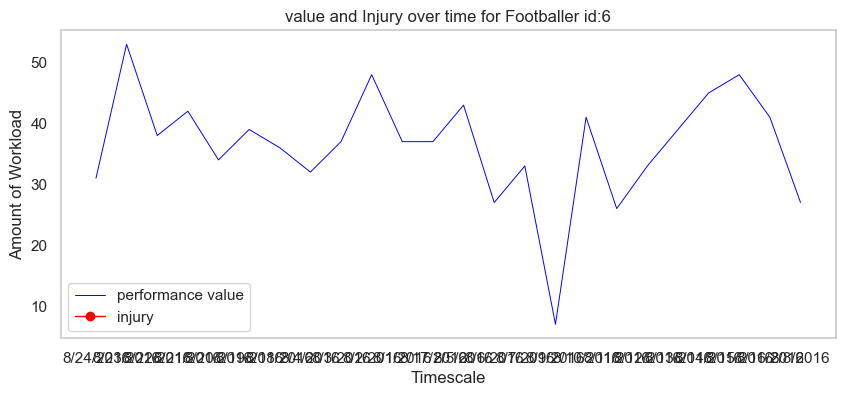

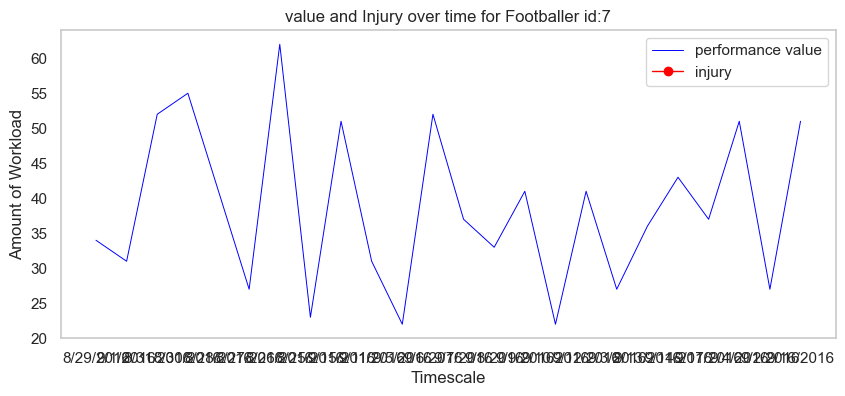

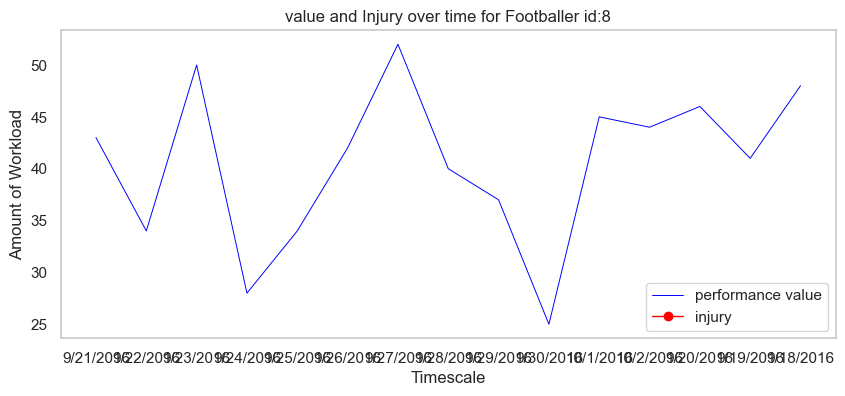

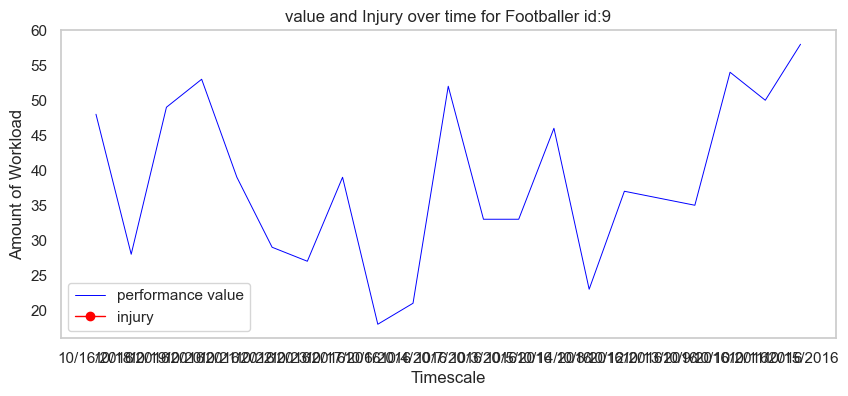

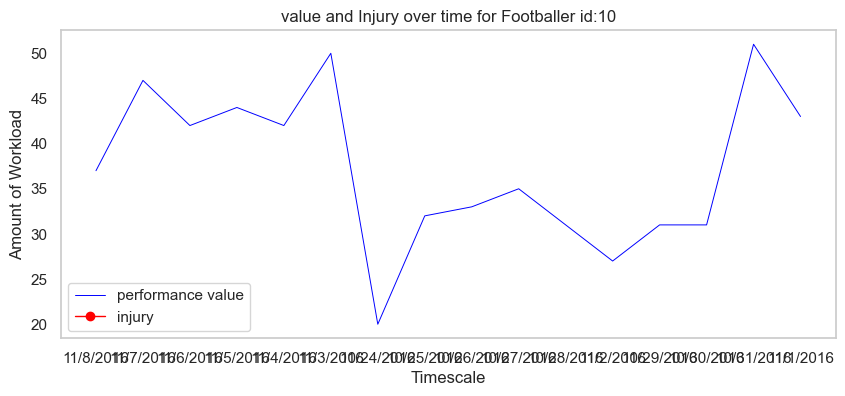

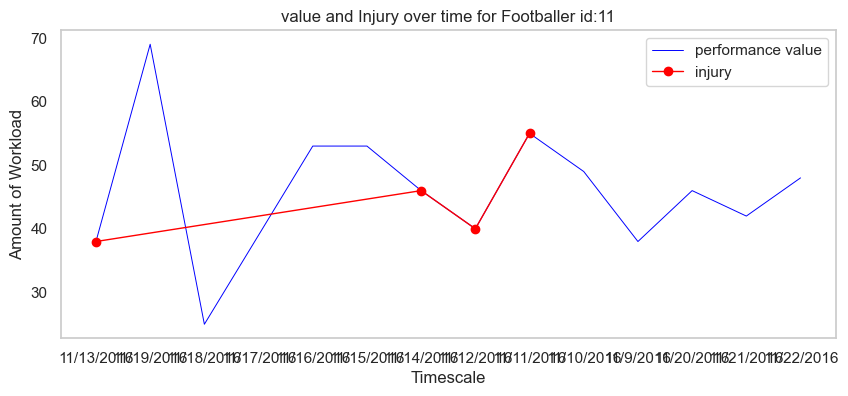

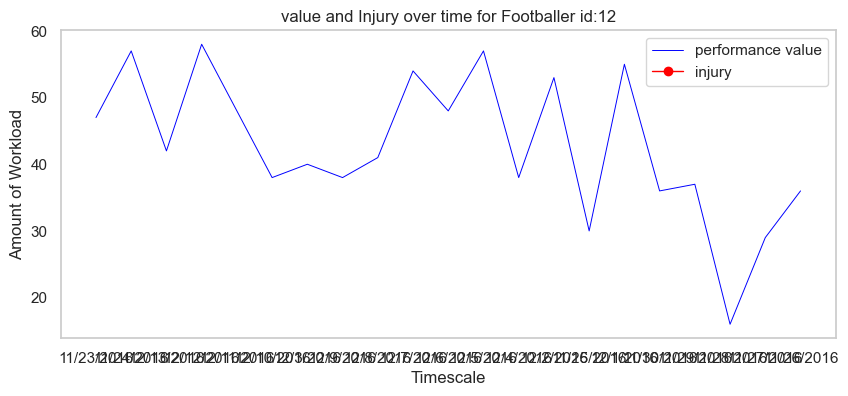

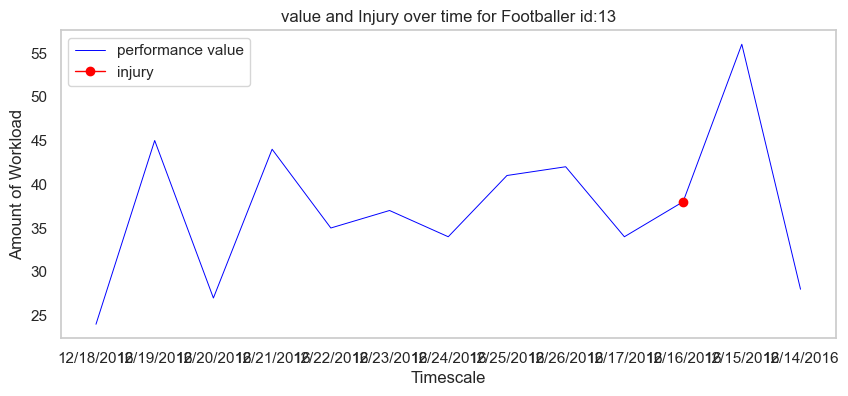

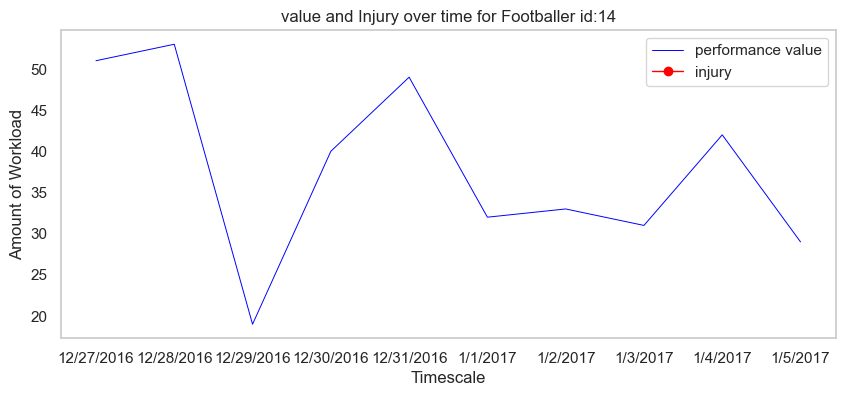

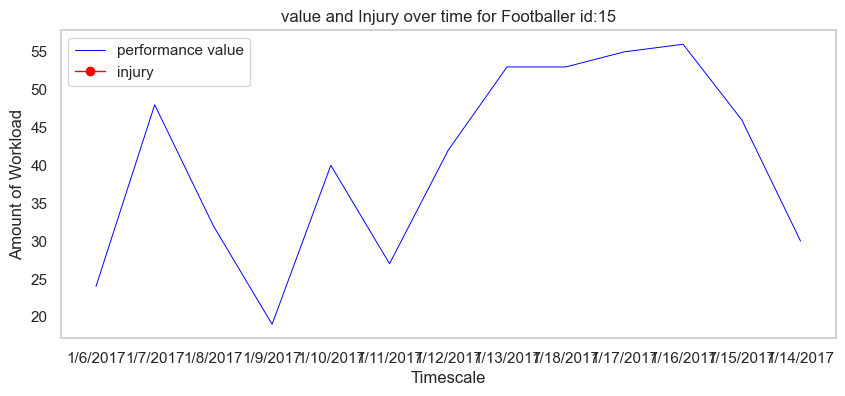

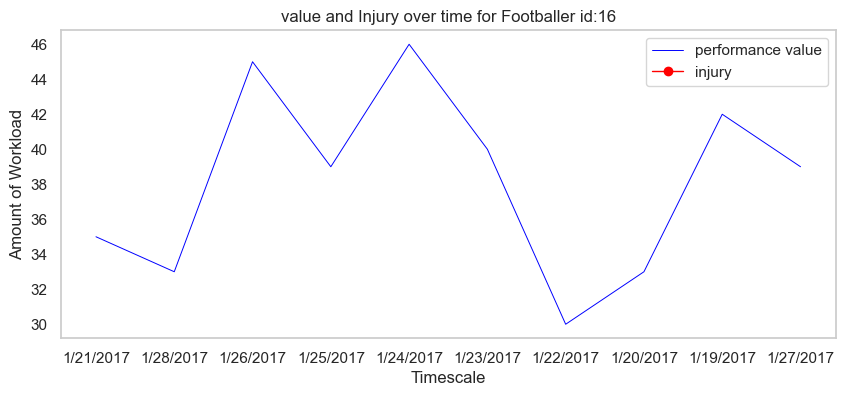

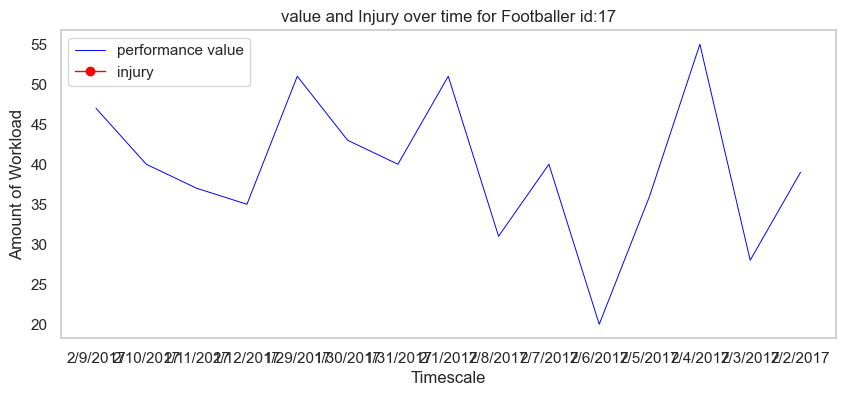

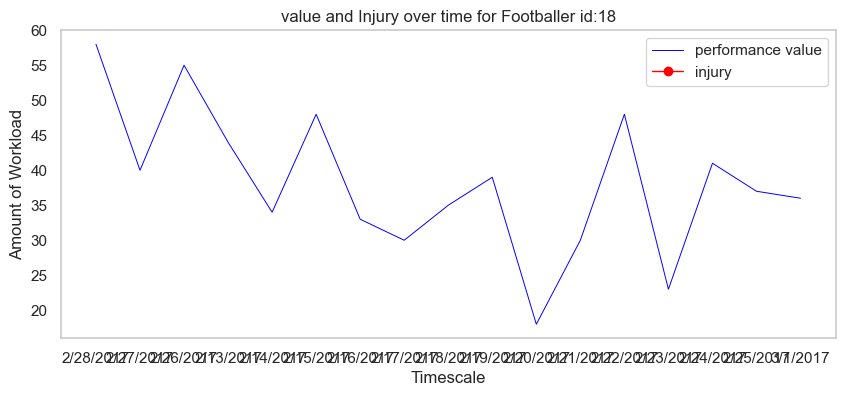

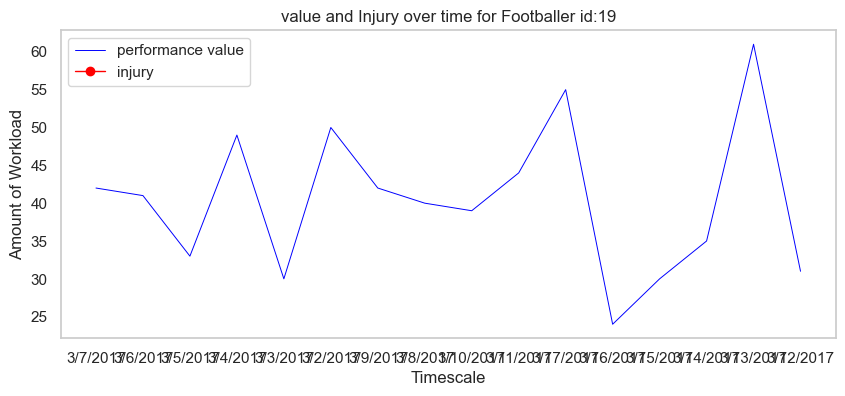

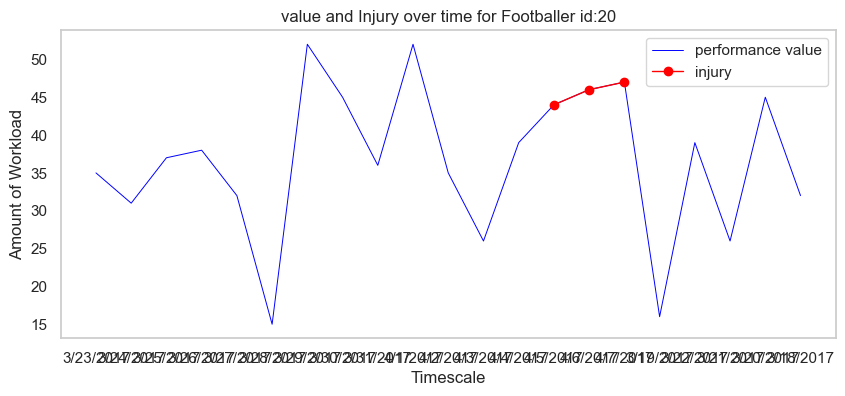

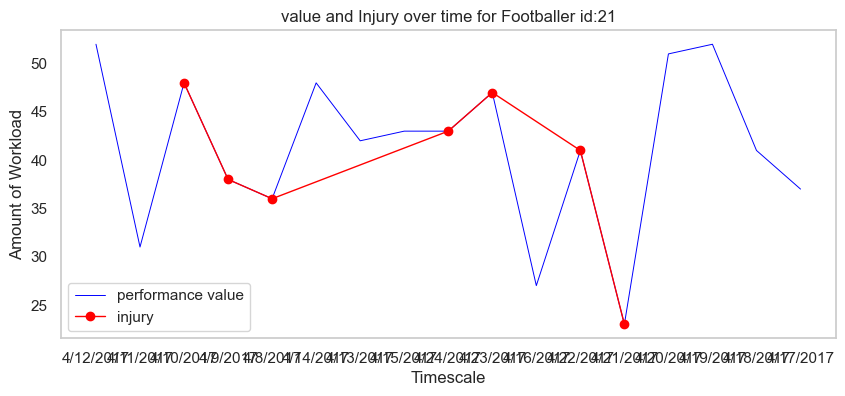

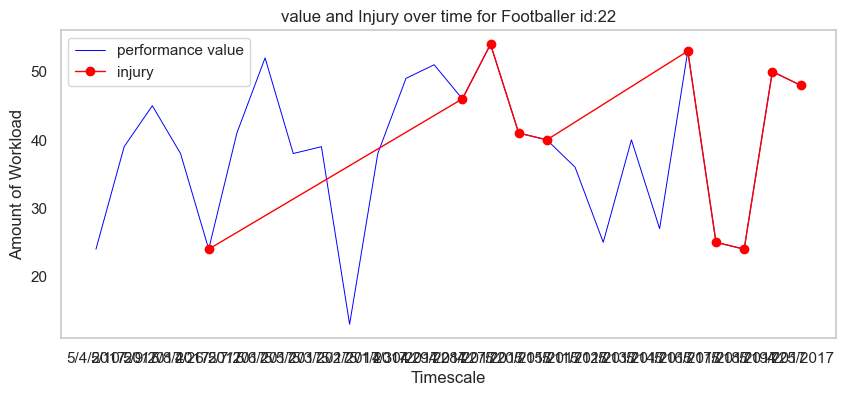

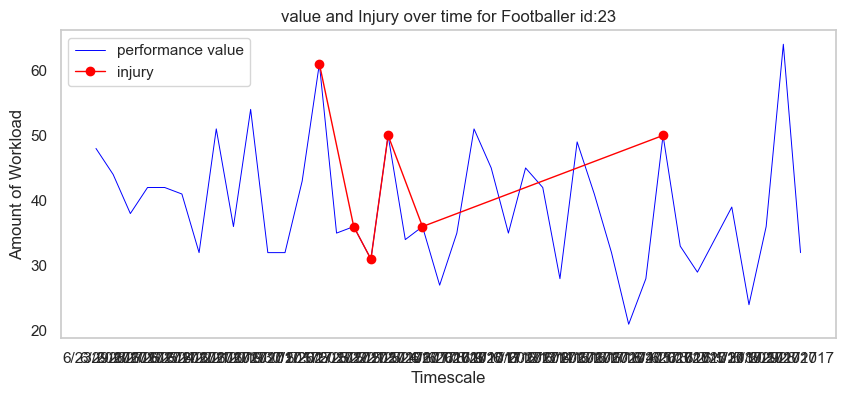

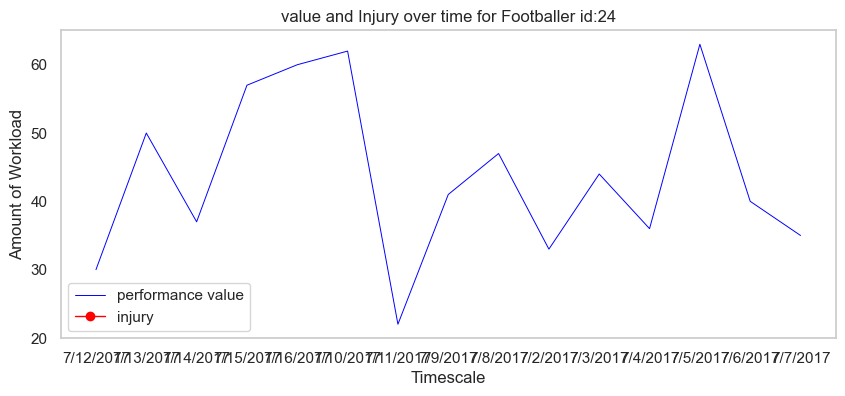

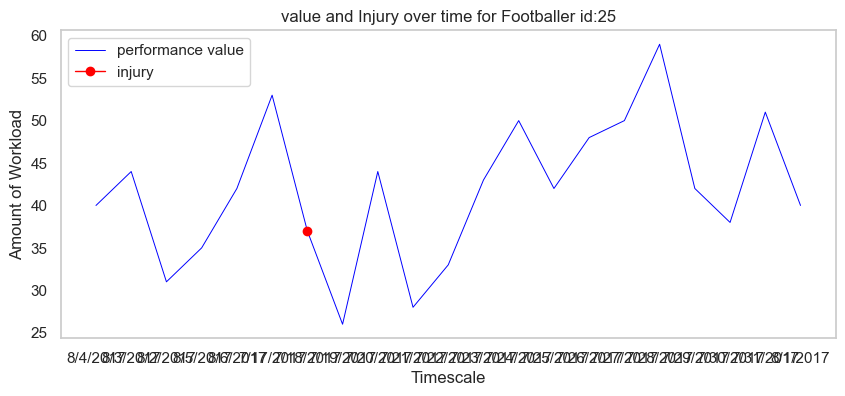

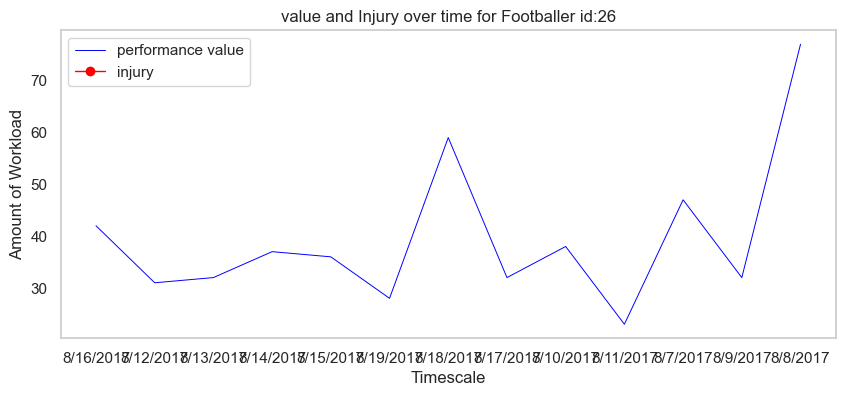

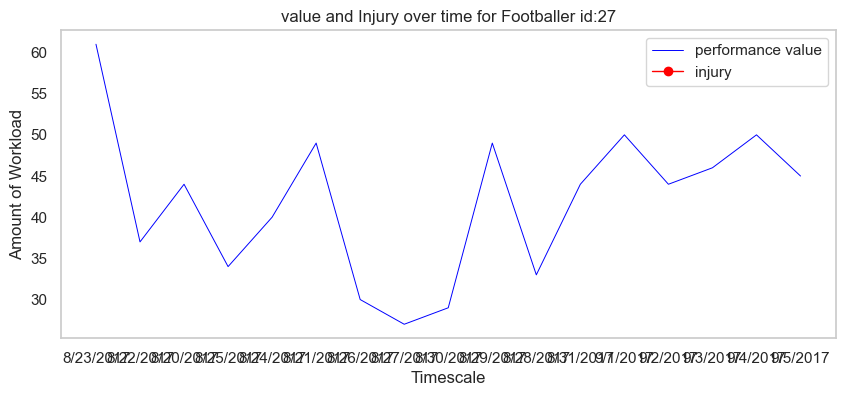

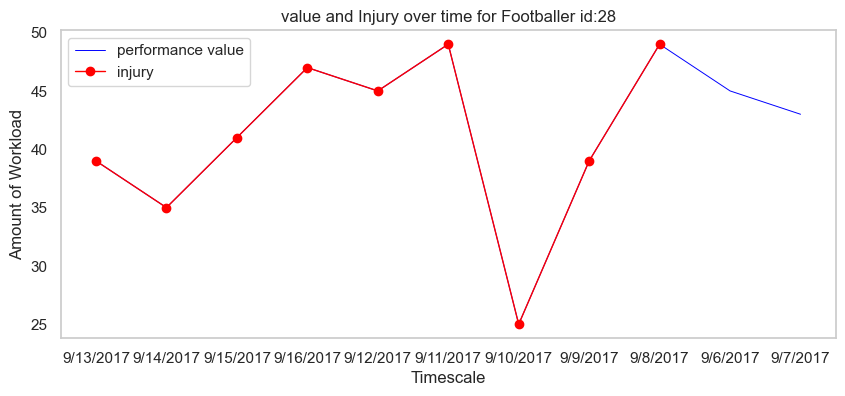

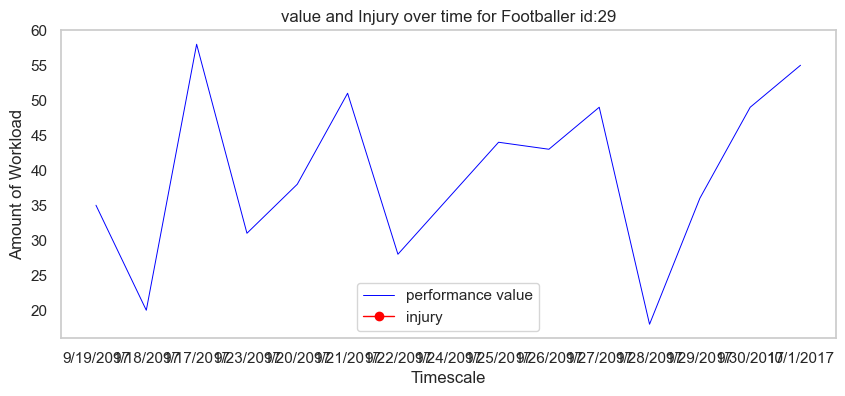

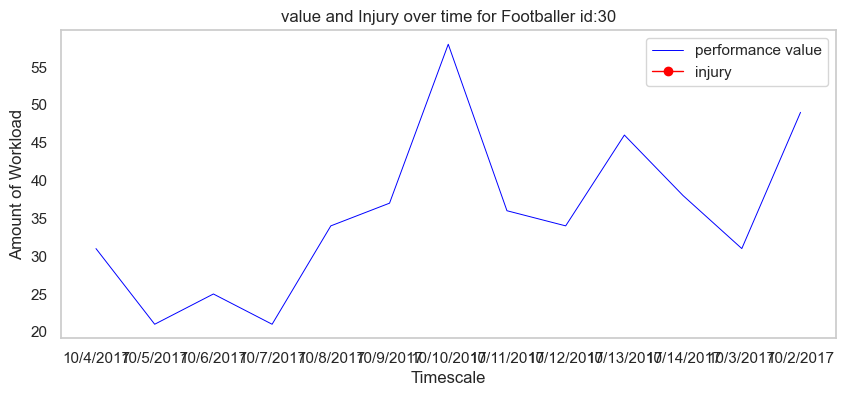

In [481]:
rcParams['figure.figsize'] = 10, 4
for i in range(1,31):
    plt.plot(desu[desu.footballer_id == i]['date'],desu[desu.footballer_id == i]['value'],
             color='blue', linewidth=0.7)
    plt.plot(desu[(desu.footballer_id == i) & (desu.injury == "Yes")]['date'],
             desu[(desu.footballer_id== i) & (desu.injury == "Yes")]['value'],
             color='red', linewidth=1, marker='o')
    plt.grid()
    plt.legend(['performance value', 'injury'])
    plt.xlabel('Timescale')
    plt.ylabel('Amount of Workload')
    plt.title('value and Injury over time for Footballer id:' + str(i))
    plt.show()

In [334]:
workload_counts = desu.groupby("footballer_id")['date'].count().sort_values().reset_index()

In [336]:
workload_counts.head()

,footballer_id,date
0,1,7
1,14,10
2,4,10
3,16,10
4,31,11


In [338]:
injury_counts = desu.groupby("footballer_id").count().reset_index()
injury_counts = injury_counts.drop('date', axis =1)
injury_counts.head()

,footballer_id,postion,value,game_workload,injury
0,1,7,7,7,7
1,2,24,24,24,24
2,3,21,21,21,21
3,4,10,10,10,10
4,5,30,30,30,30


In [340]:
player_stats = pd.merge(workload_counts,injury_counts, how='left', left_on=['footballer_id',], right_on = ['value'])

In [342]:
player_stats.fillna(0, inplace= True)
player_stats.head()

,footballer_id_x,date,footballer_id_y,postion,value,game_workload,injury
0,1,7,0.0,0.0,0.0,0.0,0.0
1,14,10,11.0,14.0,14.0,14.0,14.0
2,4,10,0.0,0.0,0.0,0.0,0.0
3,16,10,10.0,16.0,16.0,16.0,16.0
4,16,10,19.0,16.0,16.0,16.0,16.0


In [350]:
# Ensure that 'date' is in datetime format
desu['date'] = pd.to_datetime(desu['date'], errors='coerce')

# Extract year and month from 'date'
desu['year'] = desu['date'].dt.strftime('%Y')
desu['month'] = desu['date'].dt.strftime('%m')


In [362]:
desu.head()

,footballer_id,date,postion,value,game_workload,injury,year,month
0,1,2016-05-01,midfilder,36,178,No,2016,05
196,11,2016-11-13,midfilder,38,356,Yes,2016,11
202,11,2016-11-19,midfilder,69,349,No,2016,11
201,11,2016-11-18,midfilder,25,349,No,2016,11
200,11,2016-11-17,midfilder,39,356,No,2016,11


In [364]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size globally
plt.rcParams['figure.figsize'] = (10, 4)

# Get unique footballer IDs
footballer_ids = desu['footballer_id'].unique()

# Loop through each footballer
for footballer in footballer_ids:
    plt.figure()  # Create a new figure
    desu[desu['footballer_id'] == footballer].groupby(['year', 'month'])['footballer_id'].count().plot(kind="bar") 
    plt.title(f'Number of games played per month by Footballer Id {footballer}')
    plt.yticks(np.arange(0, 11, 1))
    plt.xlabel('Months and Years')
    plt.ylabel('Number of matches')
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.close()  # Close the figure to free memory

# Display all the plots (if needed, you can choose to display selectively)
plt.show()


In [357]:
from pylab import rcParams

For understanding the distribution of numerical features like performance value and game_workload.

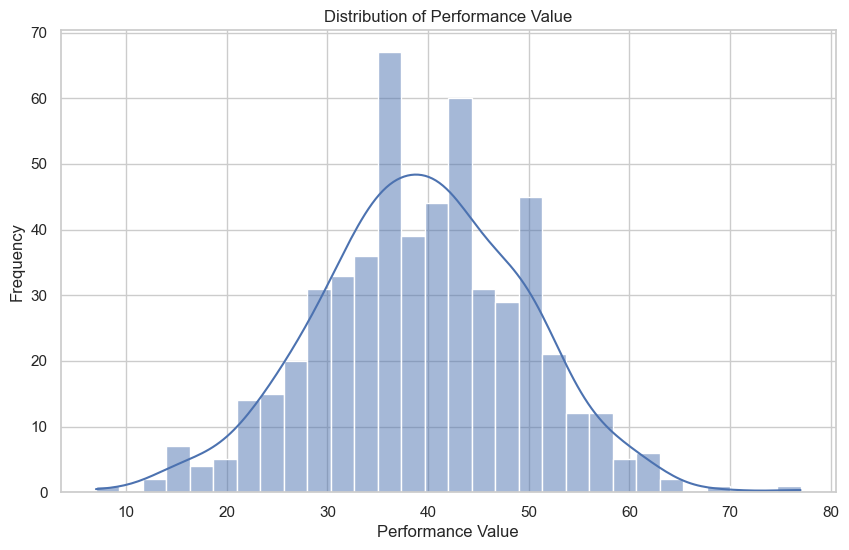

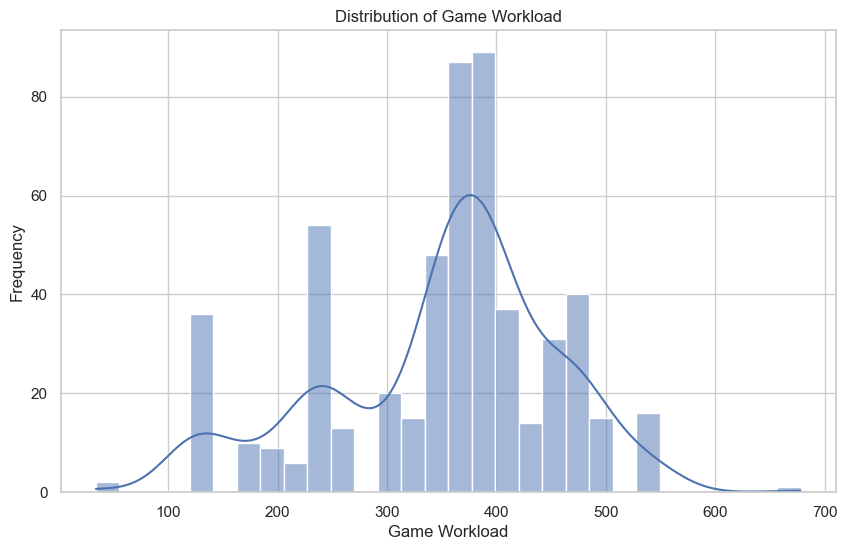

In [332]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of 'value'
plt.figure(figsize=(10, 6))
sns.histplot(desu['value'], bins=30, kde=True)
plt.title('Distribution of Performance Value')
plt.xlabel('Performance Value')
plt.ylabel('Frequency')
plt.show()

# Histogram of 'game_workload'
plt.figure(figsize=(10, 6))
sns.histplot(desu['game_workload'], bins=30, kde=True)
plt.title('Distribution of Game Workload')
plt.xlabel('Game Workload')
plt.ylabel('Frequency')
plt.show()

Plotting the number of injures occured by each athlete

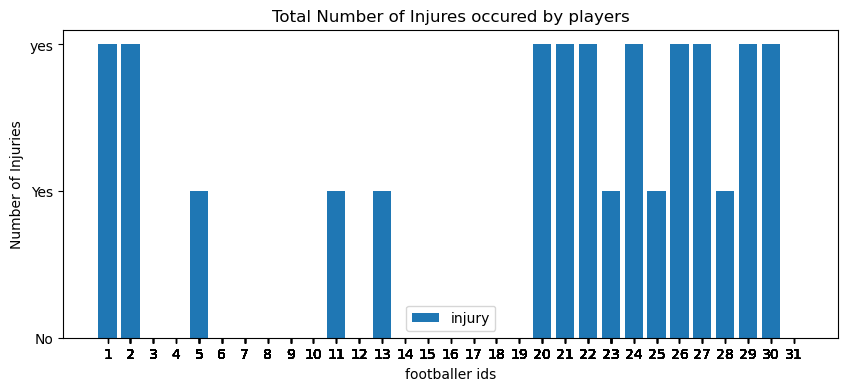

In [44]:

rcParams['figure.figsize'] = 10, 4
plt.bar(desu["footballer_id"], desu["injury"])
plt.xticks(desu["footballer_id"])
plt.legend(['injury'])
plt.title("Total Number of Injures occured by players")
plt.xlabel('footballer ids')
plt.ylabel('Number of Injuries')
plt.show()

In [46]:
"""Observed facts
Non injured player 3,4,6,7,8,9,10,12,14,15,16,17,18,19,31 (0)
least injured player 11,5,13,23,25,28 (1)
 other players are most injured players"""

'Observed facts\nNon injured player 3,4,6,7,8,9,10,12,14,15,16,17,18,19,31 (0)\nleast injured player 11,5,13,23,25,28 (1)\n other players are most injured players'

**by using count plot to see the distribution of injury status**

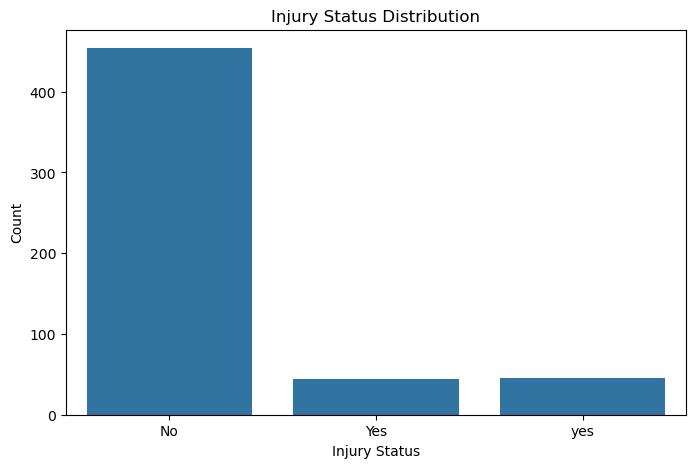

In [57]:
# Count plot for injury status
plt.figure(figsize=(8, 5))
sns.countplot(x='injury', data=desu)
plt.title('Injury Status Distribution')
plt.xlabel('Injury Status')
plt.ylabel('Count')
plt.show()

In [59]:
#  Dropping rows with missing values (if any)
desu.dropna()

,footballer_id,date,postion,value,game_workload,injury
0,1,5/1/2016,midfilder,36,178,No
196,11,11/13/2016,midfilder,38,356,Yes
202,11,11/19/2016,midfilder,69,349,No
201,11,11/18/2016,midfilder,25,349,No
200,11,11/17/2016,midfilder,39,356,No
...,...,...,...,...,...,...
318,19,3/15/2017,attacker,30,235,No
317,19,3/14/2017,attacker,35,235,No
316,19,3/13/2017,attacker,61,235,No
315,19,3/12/2017,attacker,31,235,No


to summarize the data distribution use distribution of catagoricaal features

In [62]:
# Distribution of categorical features
position_distribution = desu['postion'].value_counts()
injury_distribution = desu['injury'].value_counts()

print("Position Distribution:\n", position_distribution)
print("\nInjury Distribution:\n", injury_distribution)

Position Distribution:
 postion
attacker        189
midfilder       135
goalkeeper      102
footballer       71
coach            17
golkeeper        14
defencer         13
hip_mobility      2
Name: count, dtype: int64

Injury Distribution:
 injury
No     454
yes     45
Yes     44
Name: count, dtype: int64


# visualizing data distribution

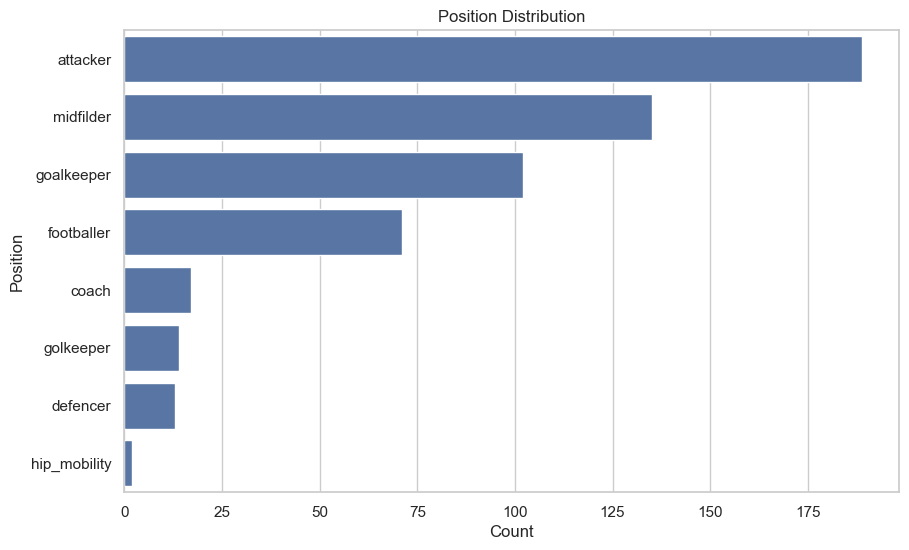

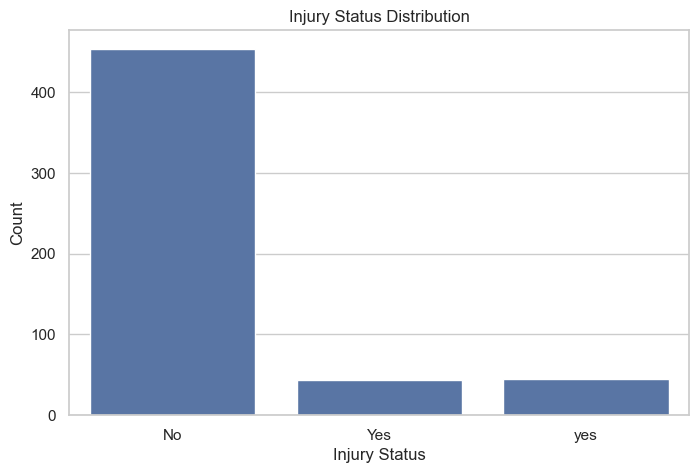

In [77]:
# Count plot for position
plt.figure(figsize=(10, 6))
sns.countplot(y='postion', data=desu, order=desu['postion'].value_counts().index)
plt.title('Position Distribution')
plt.xlabel('Count')
plt.ylabel('Position')
plt.show()

# Count plot for injury status
plt.figure(figsize=(8, 5))
sns.countplot(x='injury', data=desu)
plt.title('Injury Status Distribution')
plt.xlabel('Injury Status')
plt.ylabel('Count')
plt.show()


***Identifying Outliers
Outliers can be detected using various methods, such as the Interquartile Range (IQR) method or visualizations like box plots. Here’s how to do it using the IQR method:***

In [79]:
# Function to identify outliers using IQR
def identify_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

# Identify outliers for 'value' and 'game_workload'
outliers_value = identify_outliers_iqr(desu, 'value')
outliers_workload = identify_outliers_iqr(desu, 'game_workload')

print(f"Number of outliers in 'performance value': {outliers_value.shape[0]}")
print(f"Number of outliers in 'game_workload': {outliers_workload.shape[0]}")

Number of outliers in 'value': 5
Number of outliers in 'game_workload': 3


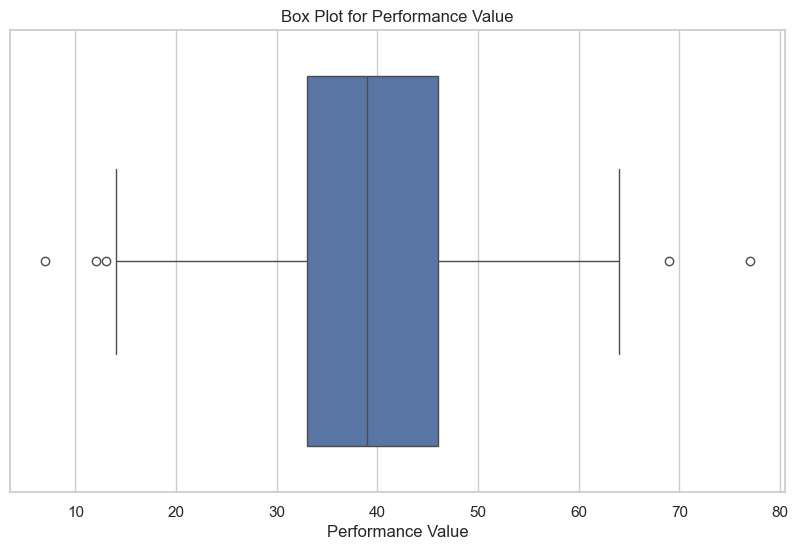

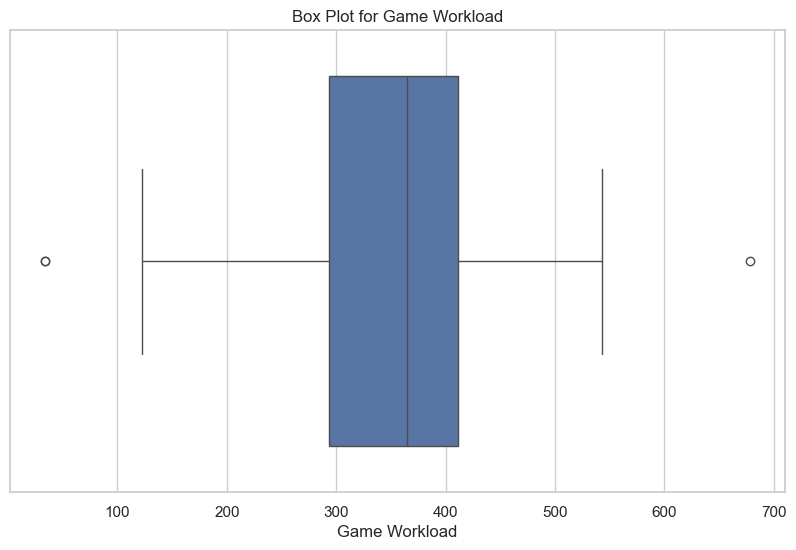

In [81]:
# Box plot for 'value'
plt.figure(figsize=(10, 6))
sns.boxplot(x=desu['value'])
plt.title('Box Plot for Performance Value')
plt.xlabel('Performance Value')
plt.show()

# Box plot for 'game_workload'
plt.figure(figsize=(10, 6))
sns.boxplot(x=desu['game_workload'])
plt.title('Box Plot for Game Workload')
plt.xlabel('Game Workload')
plt.show()

# Dtat Quality Issues

In [84]:
# Check unique values in 'postion' and 'injury'
unique_positions = desu['postion'].unique()
unique_injuries = desu['injury'].unique()

print("Unique Positions:", unique_positions)
print("Unique Injuries:", unique_injuries)

Unique Positions: ['midfilder' 'hip_mobility' 'golkeeper' 'goalkeeper' 'footballer'
 'defencer' 'coach' 'attacker']
Unique Injuries: ['No' 'Yes' 'yes']


In [88]:
# Check for negative values in numerical columns
unrealistic_values = desu[(desu['value'] < 0) | (desu['game_workload'] < 0)]
print("Unrealistic Values:\n", unrealistic_values)

Unrealistic Values:
 Empty DataFrame
Columns: [footballer_id, date, postion, value, game_workload, injury]
Index: []


# Handle the outlier in the data preprocessing

In [96]:
def remove_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Remove outliers for 'value' and 'game_workload'
desu = remove_outliers_iqr(desu, 'value')
desu = remove_outliers_iqr(desu, 'game_workload')

In [98]:
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Label Encoding for ordinal categorical features (if any)
# Assuming 'injury' is ordinal (e.g., 'no' < 'yes')
desu['injury'] = label_encoder.fit_transform(desu['injury'])

# One-Hot Encoding for nominal categorical features
# Assuming 'postion' is nominal
desu = pd.get_dummies(desu, columns=['postion'], drop_first=True)

In [101]:
desu.head()

,footballer_id,date,value,game_workload,injury,postion_coach,postion_defencer,postion_footballer,postion_goalkeeper,postion_golkeeper,postion_hip_mobility,postion_midfilder
0,1,5/1/2016,36,178,0,False,False,False,False,False,False,True
196,11,11/13/2016,38,356,1,False,False,False,False,False,False,True
201,11,11/18/2016,25,349,0,False,False,False,False,False,False,True
200,11,11/17/2016,39,356,0,False,False,False,False,False,False,True
199,11,11/16/2016,53,356,0,False,False,False,False,False,False,True


# normalize numerical features

Steps to Scale or Normalize Numerical Features
1. Identify Numerical Features
First, identify the numerical features in the dataset. In this case, we will focus on the value and game_workload columns.

2. Choose a Scaling Method
Common methods for scaling include:

Standardization (Z-score normalization): Scales the data to have a mean of 0 and a standard deviation of 1.
Min-Max Scaling: Scales the data to a fixed range, typically 0 to 1.

In [105]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize numerical features
desu[['value', 'game_workload']] = scaler.fit_transform(desu[['value', 'game_workload']])

In [107]:
desu

,footballer_id,date,value,game_workload,injury,postion_coach,postion_defencer,postion_footballer,postion_goalkeeper,postion_golkeeper,postion_hip_mobility,postion_midfilder
0,1,5/1/2016,-0.344049,-1.694766,0,False,False,False,False,False,False,True
196,11,11/13/2016,-0.139417,0.039240,1,False,False,False,False,False,False,True
201,11,11/18/2016,-1.469522,-0.028952,0,False,False,False,False,False,False,True
200,11,11/17/2016,-0.037101,0.039240,0,False,False,False,False,False,False,True
199,11,11/16/2016,1.395319,0.039240,0,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
318,19,3/15/2017,-0.957943,-1.139495,0,False,False,False,False,False,False,False
317,19,3/14/2017,-0.446364,-1.139495,0,False,False,False,False,False,False,False
316,19,3/13/2017,2.213845,-1.139495,0,False,False,False,False,False,False,False
315,19,3/12/2017,-0.855627,-1.139495,0,False,False,False,False,False,False,False


In [109]:
# Remove rows with negative values in 'value' and 'game_workload'
desu = desu[(desu['value'] >= 0) & (desu['game_workload'] >= 0)]

In [111]:
desu.head()

,footballer_id,date,value,game_workload,injury,postion_coach,postion_defencer,postion_footballer,postion_goalkeeper,postion_golkeeper,postion_hip_mobility,postion_midfilder
199,11,11/16/2016,1.395319,0.03924,0,False,False,False,False,False,False,True
198,11,11/15/2016,1.395319,0.03924,0,False,False,False,False,False,False,True
197,11,11/14/2016,0.679109,0.03924,1,False,False,False,False,False,False,True
195,11,11/12/2016,0.065214,0.03924,1,False,False,False,False,False,False,True
194,11,11/11/2016,1.599950,0.03924,1,False,False,False,False,False,False,True


In [142]:
print(desu['injury'].isna().sum())


129


In [378]:
desu = desu[desu['injury'].notna()]
desu

,footballer_id,game_workload,day,date_numeric,injury
0,1,178,1,1462060800,0
1,11,356,13,1478995200,1
2,11,349,19,1479513600,0
3,11,349,18,1479427200,0
4,11,356,17,1479340800,0
...,...,...,...,...,...
538,19,235,15,1489536000,0
539,19,235,14,1489449600,0
540,19,235,13,1489363200,0
541,19,235,12,1489276800,0


Reducing the number of features can help improve model performance and reduce overfitting. Techniques like Recursive Feature Elimination (RFE) or using feature importance from tree-based models can be employed.

In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the data
data = pd.read_csv('final2.csv')

# Preprocess data
if 'date_column' in data.columns:  # Replace 'date_column' with the actual name
    data['date_column'] = pd.to_datetime(data['date_column']).astype(int) / 10**9  # Convert to seconds since epoch

data = pd.get_dummies(data, drop_first=True)

# X = features, y = target variable (e.g., 'injury')
X = data.drop('value', axis=1)
y = data['value']

# Check class distribution
print(y.value_counts())

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model with zero_division parameter
print(classification_report(y_test, y_pred, zero_division=0))


value
36    26
42    24
41    23
37    21
40    21
39    21
35    20
44    20
33    20
49    18
38    18
31    18
48    17
43    16
45    16
27    16
34    16
46    15
32    15
51    14
50    13
47    12
30    12
53    11
52    10
28    10
29     9
55     8
24     8
23     7
25     7
58     6
54     4
21     4
26     4
15     3
59     3
16     3
22     3
62     3
18     3
56     3
20     3
61     3
57     3
60     2
19     2
64     1
13     1
63     1
12     1
69     1
7      1
17     1
14     1
77     1
Name: count, dtype: int64
              precision    recall  f1-score   support

          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         2
          27       0.00      0.00      0.00         3
          29       0.00      0.

# Splite Dataset

In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('final2.csv')  # Replace with your actual file path

# Define features (X) and target variable (y)
X = data.drop('injury', axis=1)  # Replace 'injury' with your target variable
y = data['injury']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (434, 5) (434,)
Testing set shape: (109, 5) (109,)


# Train the Model

To train the selected model (Random Forest Classifier) using the preprocessed training data,

In [199]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv('final2.csv')  # Replace with your actual file path

# Convert date columns to datetime if applicable
# data['date_column'] = pd.to_datetime(data['date_column'], errors='coerce')

# Identify categorical columns (replace with your actual column names)
categorical_cols = ['postion', 'value','athlete_id','date','game_workload']  # Example column names

# One-Hot Encoding for categorical variables
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Define features (X) and target variable (y)
X = data.drop('injury', axis=1)  # Replace 'injury' with your target variable
y = data['injury']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      1.00      0.92        89
         Yes       1.00      0.27      0.43        11
         yes       1.00      0.22      0.36         9

    accuracy                           0.86       109
   macro avg       0.95      0.50      0.57       109
weighted avg       0.88      0.86      0.83       109



Tuning hyperparameters is an essential step in optimizing your model's performance. You can use techniques like Grid Search or Randomized Search with cross-validation to find the best hyperparameters for your Random Forest model.

In [252]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Load the dataset
data = pd.read_csv('final2.csv')  # Replace with your actual file path

# Check for missing values
if data.isnull().sum().any():
    print("Missing values detected. Please handle them before proceeding.")
    # You can choose to drop or fill missing values
    # data = data.dropna()  # Example: drop rows with missing values
    # or use data.fillna(method='ffill', inplace=True)  # Example: fill missing values

# Identify categorical columns and encode them
categorical_cols = ['postion', 'value', 'athlete_id', 'date', 'game_workload']  # Example column names
for col in categorical_cols:
    if col in data.columns:
        data[col] = data[col].astype(str)  # Ensure categorical columns are of type string

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Define features (X) and target variable (y)
if 'injury' not in data.columns:
    raise ValueError("Target variable 'injury' not found in the dataset.")

X = data.drop('injury', axis=1)  # Replace 'injury' with your target variable
y = data['injury']  # Target variable

# Check for class imbalance
print("Class distribution:\n", y.value_counts())

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Updated valid values for max_features
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Make predictions on the test set using the best found model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred, zero_division=0))


Class distribution:
 injury
No     454
yes     45
Yes     44
Name: count, dtype: int64
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.9100507885592087
              precision    recall  f1-score   support

          No       0.90      0.98      0.94        89
         Yes       1.00      0.27      0.43        11
         yes       0.78      0.78      0.78         9

    accuracy                           0.89       109
   macro avg       0.89      0.68      0.71       109
weighted avg       0.90      0.89      0.87       109



  # Explanation of Evaluation Metrics


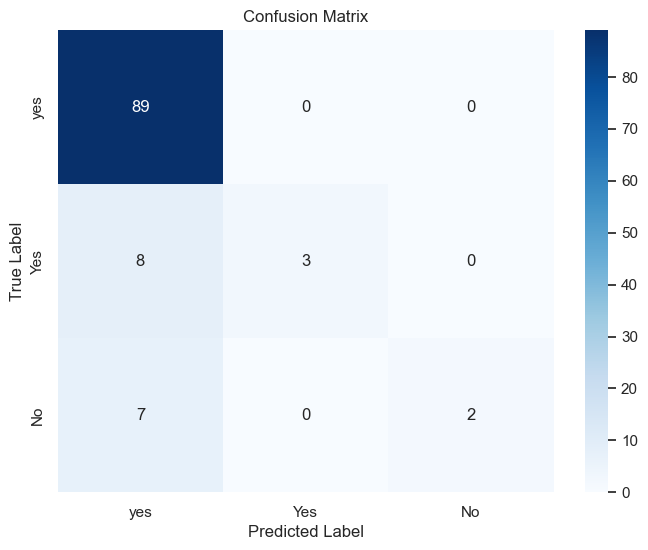

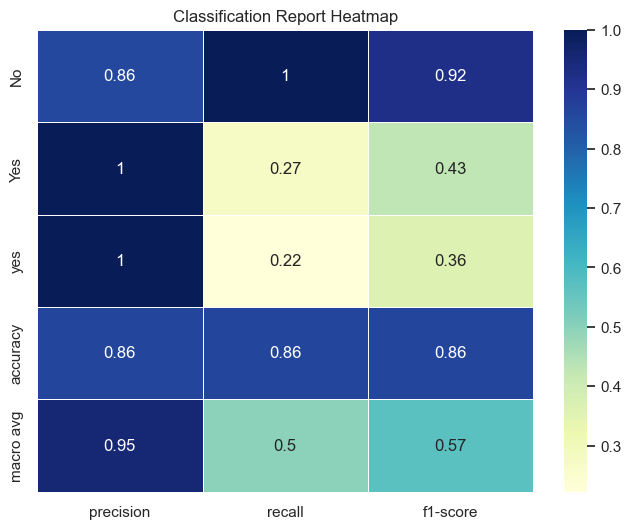

<Figure size 1000x800 with 0 Axes>

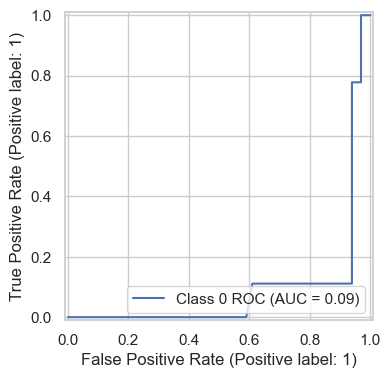

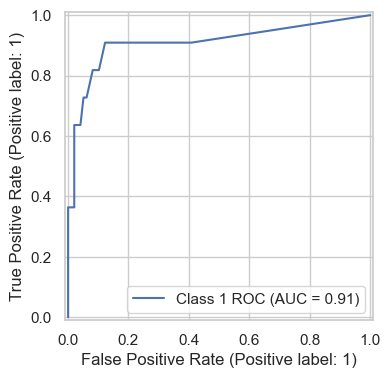

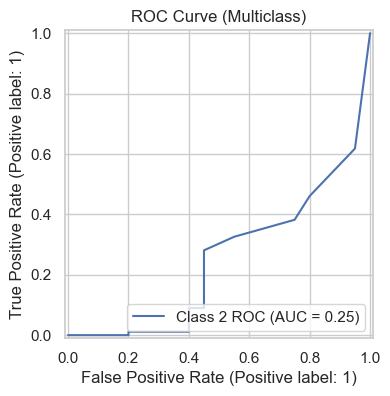

<Figure size 1000x800 with 0 Axes>

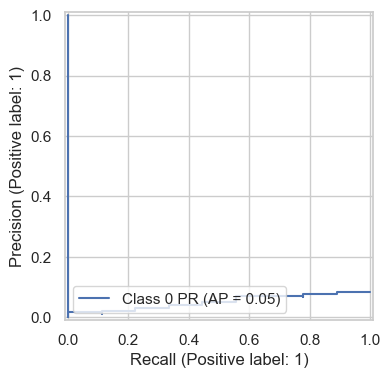

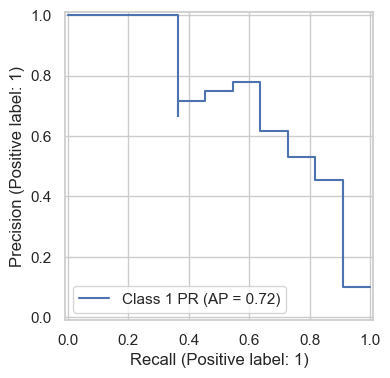

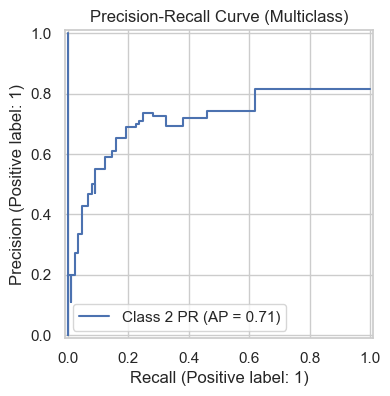

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score, 
    RocCurveDisplay, PrecisionRecallDisplay
)
from sklearn.preprocessing import label_binarize

def plot_confusion_matrix(y_test, y_pred):
    """Plot the confusion matrix."""
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(set(y_test)), yticklabels=list(set(y_test)))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

def plot_classification_report(y_test, y_pred):
    """Plot the classification report heatmap."""
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='YlGnBu', linewidths=0.5)
    plt.title('Classification Report Heatmap')
    plt.show()

def plot_roc_curve_multiclass(best_rf_model, X_test, y_test):
    """Plot ROC curve for binary or multiclass classification."""
    n_classes = len(set(y_test))
    
    # Binarize output for multiclass ROC curve plotting
    y_test_bin = label_binarize(y_test, classes=list(set(y_test)))
    
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        RocCurveDisplay.from_predictions(
            y_test_bin[:, i], best_rf_model.predict_proba(X_test)[:, i], name=f"Class {i} ROC"
        )
    plt.title("ROC Curve (Multiclass)")
    plt.show()

def plot_precision_recall_curve_multiclass(best_rf_model, X_test, y_test):
    """Plot Precision-Recall curve for binary or multiclass classification."""
    n_classes = len(set(y_test))
    
    # Binarize output for multiclass precision-recall curve plotting
    y_test_bin = label_binarize(y_test, classes=list(set(y_test)))
    
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        PrecisionRecallDisplay.from_predictions(
            y_test_bin[:, i], best_rf_model.predict_proba(X_test)[:, i], name=f"Class {i} PR"
        )
    plt.title("Precision-Recall Curve (Multiclass)")
    plt.show()

# Call visualization functions
plot_confusion_matrix(y_test, y_pred)
plot_classification_report(y_test, y_pred)
plot_roc_curve_multiclass(best_rf_model, X_test, y_test)
plot_precision_recall_curve_multiclass(best_rf_model, X_test, y_test)



# Confusion Matrix:


=== Baseline Dummy Model ===
Accuracy: 0.8165137614678899
Classification Report:
               precision    recall  f1-score   support

          No       0.82      1.00      0.90        89
         Yes       1.00      0.00      0.00        11
         yes       1.00      0.00      0.00         9

    accuracy                           0.82       109
   macro avg       0.94      0.33      0.30       109
weighted avg       0.85      0.82      0.73       109


=== Random Forest Model ===
Accuracy: 0.8623853211009175
Classification Report:
               precision    recall  f1-score   support

          No       0.86      1.00      0.92        89
         Yes       1.00      0.27      0.43        11
         yes       1.00      0.22      0.36         9

    accuracy                           0.86       109
   macro avg       0.95      0.50      0.57       109
weighted avg       0.88      0.86      0.83       109



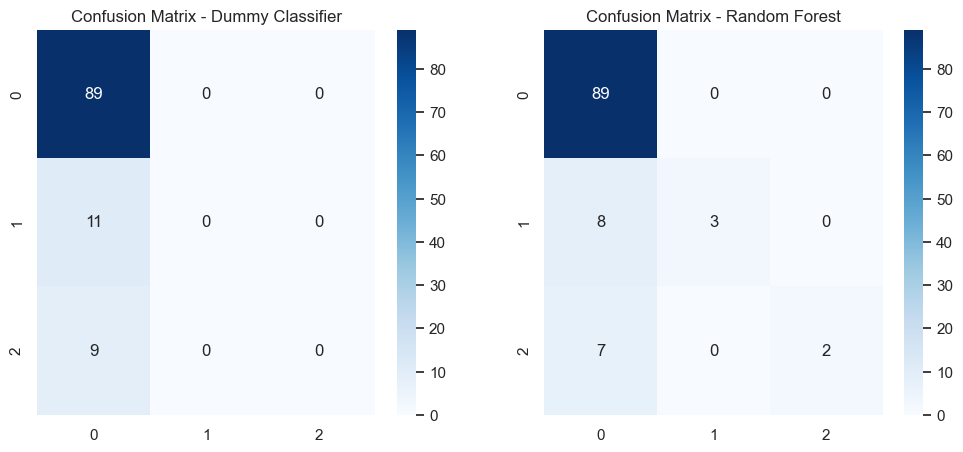

In [248]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score
)

# Load the dataset
data = pd.read_csv('final2.csv')  # Ensure correct file path

# Handle missing values
data.ffill(inplace=True)

# Define categorical columns and encode them
categorical_cols = ['postion', 'value', 'athlete_id', 'date', 'game_workload']  # Replace as needed
for col in categorical_cols:
    if col in data.columns:
        data[col] = data[col].astype(str)

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
if 'injury' not in data.columns:
    raise ValueError("Target variable 'injury' not found in the dataset.")

X = data.drop('injury', axis=1)
y = data['injury']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Dummy Classifier
dummy_model = DummyClassifier(strategy='most_frequent')  # Predicts most common class
dummy_model.fit(X_train, y_train)
dummy_pred = dummy_model.predict(X_test)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1] if len(y.unique()) == 2 else None

# Evaluation Metrics
print("=== Baseline Dummy Model ===")
print("Accuracy:", accuracy_score(y_test, dummy_pred))
print("Classification Report:\n", classification_report(y_test, dummy_pred, zero_division=1))

print("\n=== Random Forest Model ===")
print("Accuracy:", accuracy_score(y_test, rf_pred))
if rf_proba is not None:
    print("ROC AUC Score:", roc_auc_score(y_test, rf_proba))
print("Classification Report:\n", classification_report(y_test, rf_pred, zero_division=1))

# Confusion Matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, dummy_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Dummy Classifier')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')

plt.show()


In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [384]:
# Load the dataset
df = pd.read_csv('final2.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get basic statistics of the dataset
print(df.describe())

# Check the distribution of the target variable
print(df['injury'].value_counts())

   athlete_id      date    postion  value  game_workload injury
0           1  5/1/2016  midfilder     36            178     No
1           1  5/2/2016  midfilder     36            234    yes
2           1  5/3/2016  midfilder     56            678     No
3           1  5/4/2016  midfilder     24            543     No
4           1  5/5/2016  midfilder     35            402    yes
athlete_id       0
date             0
postion          0
value            0
game_workload    0
injury           0
dtype: int64
       athlete_id       value  game_workload
count  543.000000  543.000000     543.000000
mean    15.644567   39.338858     351.029466
std      8.775217   10.186784     105.176004
min      1.000000    7.000000      34.000000
25%      7.000000   33.000000     293.000000
50%     16.000000   39.000000     365.000000
75%     23.000000   46.000000     411.500000
max     31.000000   77.000000     678.000000
injury
No     454
yes     45
Yes     44
Name: count, dtype: int64


In [443]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv('final2.csv')

# Check if 'date' column exists
if 'date' not in df.columns:
    raise KeyError("The 'date' column is missing in the dataset. Please check the column names.")

# Ensure there are no NaN values in the 'date' column
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows where 'date' conversion failed (if any)
df = df.dropna(subset=['date'])

# Encode the categorical 'injury' column
label_encoder = LabelEncoder()
df['injury'] = label_encoder.fit_transform(df['injury'])

# Encode the 'postion' column
df['postion'] = label_encoder.fit_transform(df['postion'])

# Extract useful features from 'date'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop the original 'date' column
df.drop('date', axis=1, inplace=True)

# Define features and target variable
X = df.drop('injury', axis=1)
y = df['injury']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preparation completed successfully.")

Data preparation completed successfully.


# Logistic Regression

In [423]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Evaluation:")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg, zero_division=1))  # Handling undefined precision
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")


Logistic Regression Evaluation:
[[88  0  1]
 [11  0  0]
 [ 9  0  0]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89        89
           1       1.00      0.00      0.00        11
           2       0.00      0.00      0.00         9

    accuracy                           0.81       109
   macro avg       0.60      0.33      0.30       109
weighted avg       0.77      0.81      0.73       109

Accuracy: 0.81


# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Evaluation:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, zero_division=1))  # Handle undefined precision
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")


In [416]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/390.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/390.3 MB 6.1 MB/s eta 0:01:04
   ---------------------------------------- 2.9/390.3 MB 6.7 MB/s eta 0:00:58
    --------------------------------------- 5.8/390.3 MB 8.4 MB/s eta 0:00:46
    --------------------------------------- 7.9/390.3 MB 8.7 MB/s eta 0:00:45
    --------------------------------------- 9.7/390.3 MB 8.9 MB/s eta 0:00:43
   - -------------------------------------- 11.8/390.3 MB 9.0 MB/s eta 0:00:43
   - -------------------------------------- 14.2/390.3 MB 9.3 MB/s eta 0:00:41
   - -------------------------------------- 16.5/390.3 MB 9.5 MB/s eta 0:00:40
   - -------------------------------------- 18.9/390.3 MB 9.6 MB/s eta 0:00:39

# Neural Network (Using TensorFlow/Keras)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.3223 - loss: 0.7498 - val_accuracy: 0.7356 - val_loss: 0.6472
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7156 - loss: 0.6320 - val_accuracy: 0.8391 - val_loss: 0.5737
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8056 - loss: 0.5717 - val_accuracy: 0.8391 - val_loss: 0.5287
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8404 - loss: 0.5424 - val_accuracy: 0.8391 - val_loss: 0.4968
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8286 - loss: 0.5100 - val_accuracy: 0.8391 - val_loss: 0.4746
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8230 - loss: 0.4949 - val_accuracy: 0.8391 - val_loss: 0.4597
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8311 - loss: 0.4776 - val_accuracy: 0.8391 - val_loss: 0.4492
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8086 - loss: 0.4769 - val_accuracy: 0.8276 - v

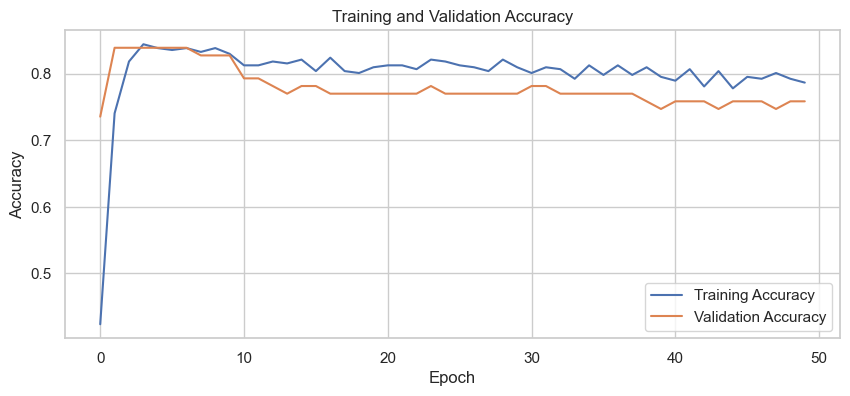

In [439]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Define the neural network architecture
model_nn = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input shape using Input layer
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_nn = (model_nn.predict(X_test) > 0.5).astype(int)

# Evaluate the model
print("Neural Network Evaluation:")
print(confusion_matrix(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn, zero_division=1))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.2f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#  K-Nearest Neighbors (KNN)

In [406]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Evaluation:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")

KNN Evaluation:
[[85  4  0]
 [ 9  2  0]
 [ 5  1  3]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.90        89
           1       0.29      0.18      0.22        11
           2       1.00      0.33      0.50         9

    accuracy                           0.83       109
   macro avg       0.71      0.49      0.54       109
weighted avg       0.81      0.83      0.80       109

Accuracy: 0.83


In [433]:
pip install xgboost



   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 1.4 MB/s eta 0:01:30
   ---------------------------------------- 1.0/124.9 MB 1.6 MB/s eta 0:01:19
   ---------------------------------------- 1.3/124.9 MB 1.6 MB/s eta 0:01:16
    --------------------------------------- 1.8/124.9 MB 1.8 MB/s eta 0:01:10
    --------------------------------------- 2.4/124.9 MB 1.9 MB/s eta 0:01:04
    --------------------------------------- 2.9/124.9 MB 2.0 MB/s eta 0:01:01
   - -------------------------------------- 3.4/124.9 MB 2.2 MB/s eta 0:00:57
   - -------------------------------------- 4.2/124.9 MB 2.3 MB/s eta 0:00:52
   - -------------------------------------- 5.0/124.9 MB 2.5 MB/s eta 0:00:49
   - -------------------------------------- 6.0/124.9 MB 2.7 MB/s eta 0:00:44
   -- 

# Comparison of Models

In [434]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Assuming your data (X_train, X_test, y_train, y_test) is already preprocessed

# Train an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Now define your results dictionary as before
results = {
    'Model': ['Random Forest', 'Logistic Regression', 'SVM', 'XGBoost', 'Neural Network', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_log_reg),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_xgb),  # Now it's defined
        accuracy_score(y_test, y_pred_nn),
        accuracy_score(y_test, y_pred_knn)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy
0        Random Forest  0.908257
1  Logistic Regression  0.807339
2                  SVM  0.816514
3              XGBoost  0.880734
4       Neural Network  0.770642
5                  KNN  0.825688


# Hyperparameter Tuning (Optional)

Confusion Matrix:
[[87  0  2]
 [ 7  4  0]
 [ 1  0  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        89
           1       1.00      0.36      0.53        11
           2       0.80      0.89      0.84         9

    accuracy                           0.91       109
   macro avg       0.91      0.74      0.77       109
weighted avg       0.91      0.91      0.90       109


Accuracy Score:
0.908256880733945

ROC AUC Score: 0.9549353467411251


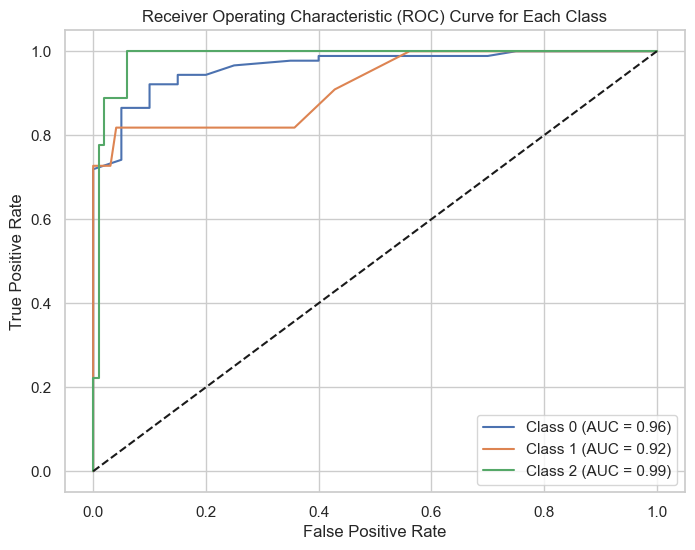

In [431]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# ROC AUC Score (Multi-Class Classification using One-vs-Rest)
y_pred_proba = model.predict_proba(X_test)  # Probabilities for each class
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print(f"\nROC AUC Score: {roc_auc}")

# Plot ROC Curve for each class
# For multi-class, we need to plot ROC for each class individually
n_classes = y_pred_proba.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_pred_proba[:, i])  # Compute AUC for each class
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plotting random chance line
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc="lower right")
plt.show()


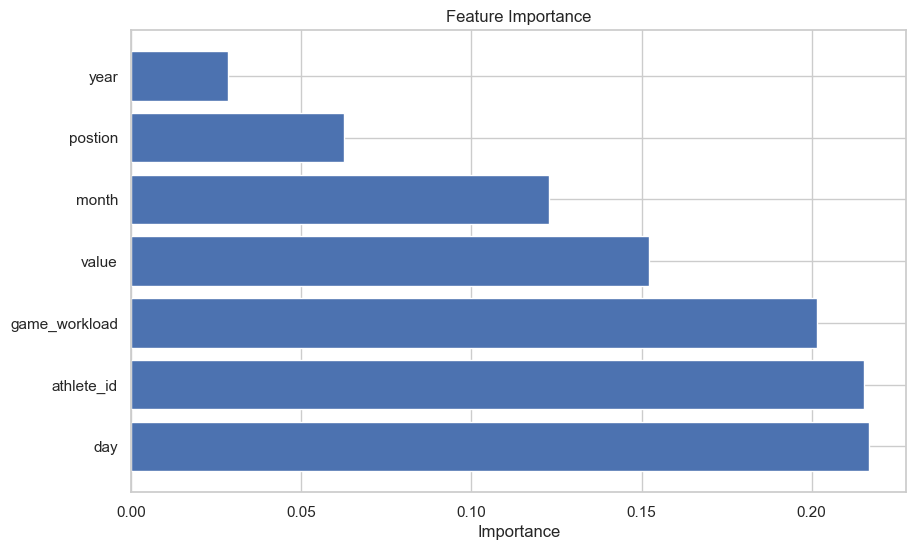

In [394]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [398]:
# Load the model and scaler
model = joblib.load('injury_prediction_model.pkl')
scaler = joblib.load('scaler.pkl')

# Example of making a prediction
new_data = pd.DataFrame({
    'athlete_id': [1],
    'postion': [0],  # Encoded value for 'midfielder'
    'value': [36],
    'game_workload': [178],
    'year': [2016],
    'month': [5],
    'day': [1]
})

# Preprocess the new data
new_data_scaled = scaler.transform(new_data)

# Make a prediction
prediction = model.predict(new_data_scaled)
print(f"Predicted Injury: {'Yes' if prediction[0] == 1 else 'No'}")

Predicted Injury: No


In [485]:
pip install fastapi uvicorn joblib pandas

Note: you may need to restart the kernel to use updated packages.


In [491]:
from fastapi import FastAPI, HTTPException
import joblib
import pandas as pd
from pydantic import BaseModel

# Load the trained model and scaler
model = joblib.load('injury_prediction_model.pkl')
scaler = joblib.load('scaler.pkl')

# Define the input data schema using Pydantic
class InjuryPredictionInput(BaseModel):
    athlete_id: int
    postion: str
    value: float
    game_workload: int
    year: int
    month: int
    day: int

# Initialize FastAPI app
app = FastAPI()

# Define the prediction endpoint
@app.post("/predict")
def predict_injury(input_data: InjuryPredictionInput):
    try:
        # Convert input data to a DataFrame
        input_dict = input_data.dict()
        input_df = pd.DataFrame([input_dict])

        # Encode the 'postion' column (if necessary)
        # Assuming 'postion' is already encoded in the model
        input_df['postion'] = input_df['postion'].map({'midfielder': 0, 'attacker': 1})

        # Standardize the features
        input_scaled = scaler.transform(input_df)

        # Make a prediction
        prediction = model.predict(input_scaled)
        prediction_proba = model.predict_proba(input_scaled)

        # Return the prediction result
        return {
            "prediction": int(prediction[0]),
            "probability": float(prediction_proba[0][1]),
            "message": "Injury predicted successfully."
        }
    except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))

# Root endpoint
@app.get("/")
def read_root():
    return {"message": "Welcome to the Sports Injury Prediction API!"}

In [2]:
pip install nbconvert

In [5]:
import nbformat
from nbconvert import PythonExporter

# Load the notebook
notebook_filename = "finalMac.ipynb"
with open(notebook_filename, 'r', encoding='utf-8') as f:
    notebook_content = nbformat.read(f, as_version=4)

# Convert to Python script
python_exporter = PythonExporter()
script, _ = python_exporter.from_notebook_node(notebook_content)

# Save the script
python_filename = "final2.py"
with open(python_filename, 'w', encoding='utf-8') as f:
    f.write(script)

print(f"Converted {notebook_filename} to {python_filename}")

Converted finalMac.ipynb to final2.py


In [12]:
from fastapi import FastAPI, HTTPException
import joblib
import pandas as pd
from pydantic import BaseModel

# Load the trained model and scaler
model = joblib.load('injury_prediction_model.pkl')
scaler = joblib.load('scaler.pkl')

# Define the input data schema using Pydantic
class InjuryPredictionInput(BaseModel):
    athlete_id: int
    postion: str
    value: float
    game_workload: int
    year: int
    month: int
    day: int

# Initialize FastAPI app
app = FastAPI()

# Define the prediction endpoint
@app.post("/predict")
def predict_injury(input_data: InjuryPredictionInput):
    try:
        # Convert input data to a DataFrame
        input_dict = input_data.dict()
        input_df = pd.DataFrame([input_dict])

        # Encode the 'postion' column (if necessary)
        # Assuming 'postion' is already encoded in the model
        input_df['postion'] = input_df['postion'].map({'midfielder': 0, 'attacker': 1})

        # Standardize the features
        input_scaled = scaler.transform(input_df)

        # Make a prediction
        prediction = model.predict(input_scaled)
        prediction_proba = model.predict_proba(input_scaled)

        # Return the prediction result
        return {
            "prediction": int(prediction[0]),
            "probability": float(prediction_proba[0][1]),
            "message": "Injury predicted successfully."
        }
    except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))

# Root endpoint
@app.get("/")
def read_root():
    return {"message": "Welcome to the Sports Injury Prediction API!"}

In [505]:
pip install fastapi uvicorn joblib pandas

Note: you may need to restart the kernel to use updated packages.


In [509]:
pip install fastapi uvicorn pydantic joblib


Note: you may need to restart the kernel to use updated packages.


In [511]:
import joblib

# Save your model
joblib.dump(model_nn, 'model_nn.pkl')
print("Model saved successfully!")


Model saved successfully!


In [2]:
pip install fastapi uvicorn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [11]:
# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=4, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Save the trained model using Joblib
joblib.dump(rf_model, 'model_nn.pkl')


['model_nn.pkl']

In [13]:
import joblib

# Assuming `model` is your trained model
joblib.dump(rf_model, 'model_nn.pkl')

['model_nn.pkl']

In [25]:
pip install uvicorn

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install FastAPi

Note: you may need to restart the kernel to use updated packages.


In [9]:
import joblib
import pandas as pd
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel

# Load the trained model and scaler
model = joblib.load('model_nn.pkl')
scaler = joblib.load('scaler.pkl')

# Define the input data schema using Pydantic
class InjuryPredictionInput(BaseModel):
    athlete_id: int
    postion: str
    value: float
    game_workload: int
    year: int
    month: int
    day: int

# Initialize FastAPI app
app = FastAPI()

# Define the prediction endpoint
@app.post("/predict")
def predict_injury(input_data: InjuryPredictionInput):
    try:
        # Convert input data to a DataFrame
        input_dict = input_data.dict()
        input_df = pd.DataFrame([input_dict])

        # Encode the 'postion' column (if necessary)
        input_df['postion'] = input_df['postion'].map({'midfielder': 0, 'attacker': 1})

        # Standardize the features
        input_scaled = scaler.transform(input_df)

        # Make a prediction
        prediction = model.predict(input_scaled)
        prediction_proba = model.predict_proba(input_scaled)

        # Return the prediction result
        return {
            "prediction": int(prediction[0]),
            "probability": float(prediction_proba[0][1]),
            "message": "Injury predicted successfully."
        }
    except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))

# Root endpoint
@app.get("/")
def read_root():
    return {"message": "Welcome to the Sports Injury Prediction API!"}


In [15]:
!uvicorn finalMac:app --host 0.0.0.0 --port 8000 --reload
